In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('C:/Users/User/Downloads/insurance.csv')
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

Размер данных: (1338, 7)

Первые 5 строк:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


=== 1. ПОДГОТОВКА ДАННЫХ ===

Пропуски в данных:
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
sex_encoded       0
smoker_encoded    0
region_encoded    0
dtype: int64

Проверка выбросов...


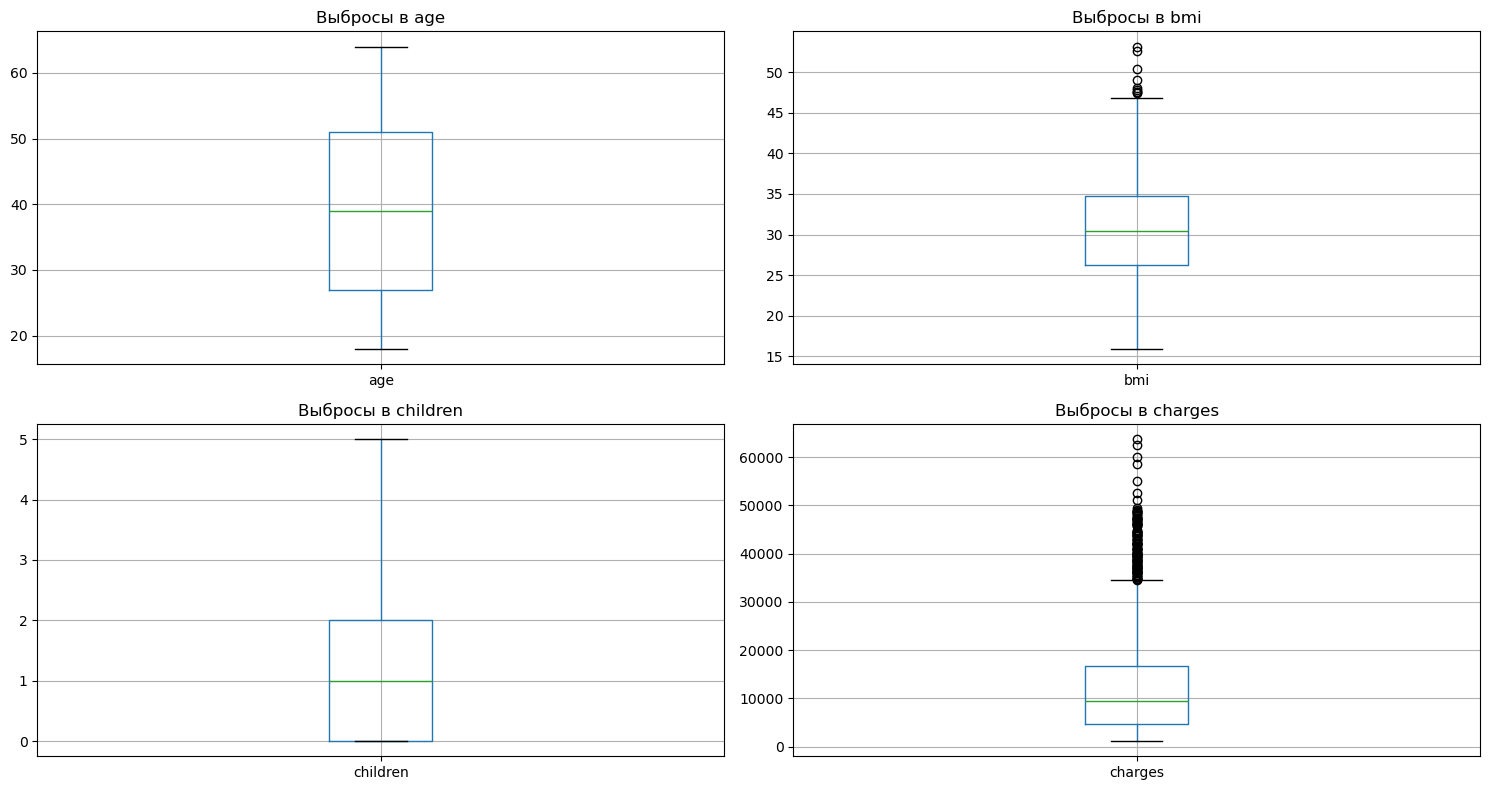


Преобразование категориальных признаков...
sex: {'female': 0, 'male': 1}
smoker: {'no': 0, 'yes': 1}
region: {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}

Матрица корреляций:


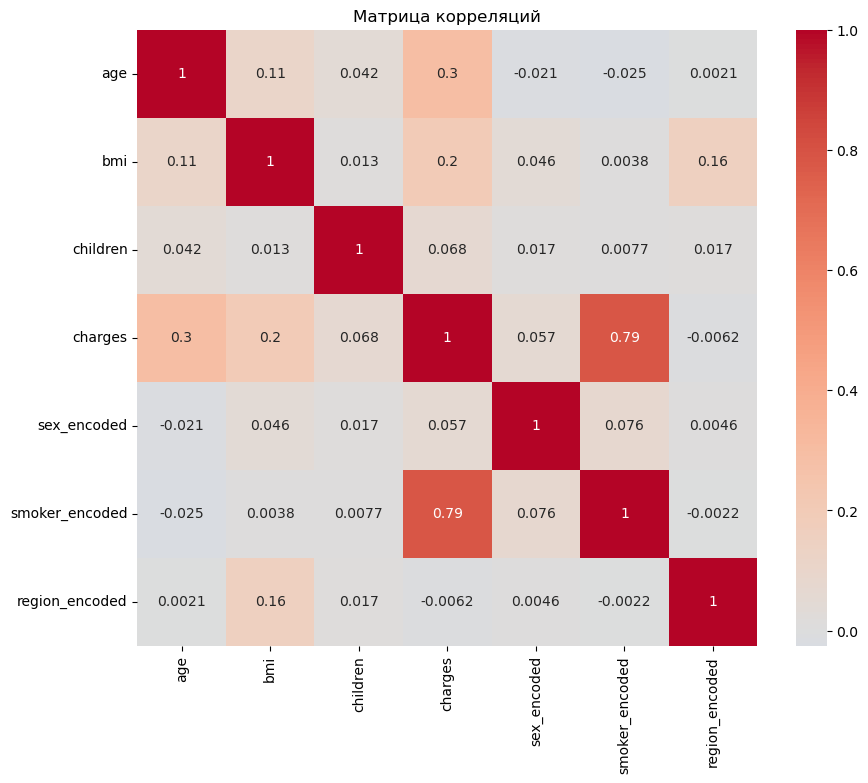

Корреляции с целевой переменной charges:
charges           1.000000
smoker_encoded    0.787251
age               0.299008
bmi               0.198341
children          0.067998
sex_encoded       0.057292
region_encoded   -0.006208
Name: charges, dtype: float64

Первые 5 строк:
   age     sex     bmi  children smoker     region      charges  sex_encoded  \
0   19  female  27.900         0    yes  southwest  16884.92400            0   
1   18    male  33.770         1     no  southeast   1725.55230            1   
2   28    male  33.000         3     no  southeast   4449.46200            1   
3   33    male  22.705         0     no  northwest  21984.47061            1   
4   32    male  28.880         0     no  northwest   3866.85520            1   

   smoker_encoded  region_encoded  
0               1               3  
1               0               2  
2               0               2  
3               0               1  
4               0               1  


In [6]:
# 1. Подготовка данных
print("=== 1. ПОДГОТОВКА ДАННЫХ ===")

# Проверка пропусков
print("\nПропуски в данных:")
print(df.isnull().sum())

# Проверка выбросов с помощью boxplot
print("\nПроверка выбросов...")
numeric_columns = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=col)
    plt.title(f'Выбросы в {col}')
plt.tight_layout()
plt.show()

# Приведение категориальных признаков к числовым
print("\nПреобразование категориальных признаков...")
categorical_columns = ['sex', 'smoker', 'region']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Вычисление парных корреляций
print("\nМатрица корреляций:")
correlation_matrix = df[['age', 'bmi', 'children', 'charges', 
                        'sex_encoded', 'smoker_encoded', 'region_encoded']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

print("Корреляции с целевой переменной charges:")
print(correlation_matrix['charges'].sort_values(ascending=False))

print("\nПервые 5 строк:")
print(df.head())

1. Выводы: 
1)проверить наличие пропусков и выбросов: Пропусков нет, есть выбросы в столбцах bmi и charges
2)привести категориальные признаки к числовым:
Категориальные/номинальные - принимают конечное число значений. Значения нельзя упорядочить. В нашем случае это столбец region. Однако для удобства я предпочла преобразование аналогичное порядковым признакам(northeast,northwest,southeast,southwest)->(0,1,2,3)
3)вычислить парные корреляции признаков : наибольшие значиения корреляции между в парах значений (charges,smoker),(charges,age) и (charges, bmi)

Размер тренировочной выборки: (1070, 7)
Размер тестовой выборки: (268, 7)

=== 2. МНОГОМЕРНАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ ===
Веса (аналитическое решение):
Intercept: -11946.61
age: 257.06
bmi: 335.78
children: 425.09
sex_encoded: -18.79
smoker_encoded: 23647.82
region_encoded: -271.28

Обучение градиентным спуском...
Итерация 0, MSE: 322451733.18
Итерация 100, MSE: 228333130.38
Итерация 200, MSE: 165355888.29
Итерация 300, MSE: 123190448.51
Итерация 400, MSE: 94942005.90
Итерация 500, MSE: 76005617.12
Итерация 600, MSE: 63303844.39
Итерация 700, MSE: 54778819.94
Итерация 800, MSE: 49053622.23
Итерация 900, MSE: 45206391.84
Итерация 1000, MSE: 42619561.86
Итерация 1100, MSE: 40879163.96
Итерация 1200, MSE: 39707537.89
Итерация 1300, MSE: 38918336.21
Итерация 1400, MSE: 38386419.01
Итерация 1500, MSE: 38027699.07
Итерация 1600, MSE: 37785640.36
Итерация 1700, MSE: 37622208.10
Итерация 1800, MSE: 37511799.04
Итерация 1900, MSE: 37437168.02

Веса (градиентный спуск):
Intercept: 13072.82
age: 3532.

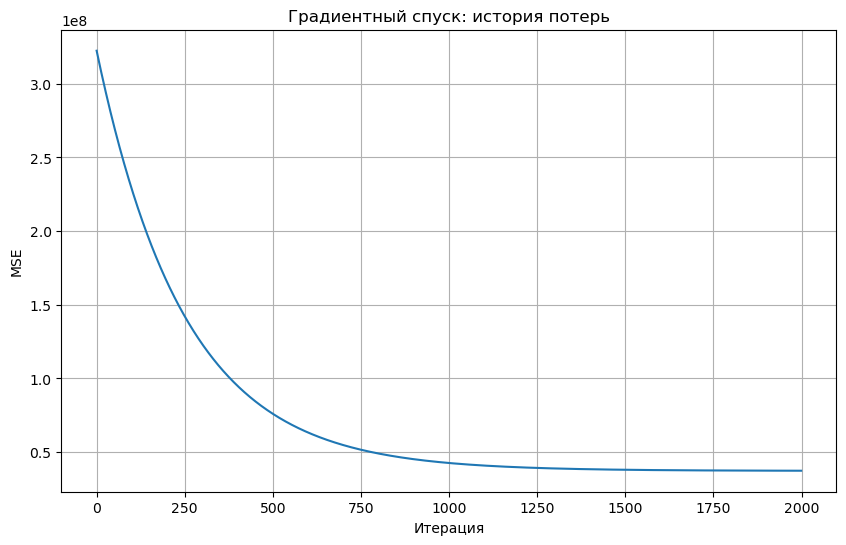

In [7]:
# Подготовка данных для моделей
# Выбираем признаки и целевую переменную
features = ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']
X = df[features].values
y = df['charges'].values

# Добавляем столбец единиц для intercept
X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Добавляем intercept к масштабированным данным
X_scaled_with_intercept = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])

# Разделение на train/test
X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_with_intercept, X_scaled_with_intercept, y, test_size=0.2, random_state=42)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# 2. МНОГОМЕРНАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ
print("\n=== 2. МНОГОМЕРНАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ ===")

# 2.1 Аналитическое решение (нормальное уравнение)
def analytical_solution(X, y):
    """Аналитическое решение методом нормальных уравнений"""
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Вычисляем веса аналитически
weights_analytical = analytical_solution(X_train, y_train)
print("Веса (аналитическое решение):")
print(f"Intercept: {weights_analytical[0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature}: {weights_analytical[i+1]:.2f}")

# Функция для предсказания
def predict(X, weights):
    return X @ weights

# Функция для вычисления MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 2.2 Градиентный спуск (реализация)
class GradientDescent:
    def __init__(self, learning_rate=0.01, max_iter=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.weights = None
        self.loss_history = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        for i in range(self.max_iter):
            # Предсказания
            y_pred = X @ self.weights
            
            # Вычисление градиента
            gradient = (2/n_samples) * X.T @ (y_pred - y)
            
            # Обновление весов
            new_weights = self.weights - self.learning_rate * gradient
            
            # Проверка сходимости
            if np.linalg.norm(new_weights - self.weights) < self.tolerance:
                print(f"Сходимость достигнута на итерации {i}")
                break
                
            self.weights = new_weights
            
            # Сохранение истории потерь
            loss = mse(y, y_pred)
            self.loss_history.append(loss)
            
            if i % 100 == 0:
                print(f"Итерация {i}, MSE: {loss:.2f}")
    
    def predict(self, X):
        return X @ self.weights

# Обучаем модель градиентным спуском
print("\nОбучение градиентным спуском...")
gd = GradientDescent(learning_rate=0.001, max_iter=2000)
gd.fit(X_train_scaled, y_train)

print("\nВеса (градиентный спуск):")
print(f"Intercept: {gd.weights[0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature}: {gd.weights[i+1]:.2f}")

# Визуализация процесса обучения
plt.figure(figsize=(10, 6))
plt.plot(gd.loss_history)
plt.title('Градиентный спуск: история потерь')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

Прямое (нормальное) уравнение в аналитической виде w = (X^{T}X)^{-1}X^{T} y, где в данном случае w — вектор весов, включая смещение b. Главный недостаток данного способа заключается в высокой вычислительной сложности при большом количестве признаков.
Градиентный спуск: Вычисление градиента gradient = (2/n_samples) * X.T @ (y_pred - y), обновление весов new_weights = self.weights - self.learning_rate * gradient


=== 3. РЕГУЛЯРИЗАЦИЯ ===
Подбор оптимального alpha для Ridge регрессии:
Alpha: 0.001, MSE: 33635233.87
Alpha: 0.01, MSE: 33635445.65
Alpha: 0.1, MSE: 33637643.21
Alpha: 1, MSE: 33667248.81
Alpha: 10, MSE: 34484366.40
Alpha: 100, MSE: 50857468.20

Лучший alpha: 0.001
Веса (Ridge аналитическое):
Intercept: -11946.20
age: 257.05
bmi: 335.77
children: 425.08
sex_encoded: -18.80
smoker_encoded: 23647.67
region_encoded: -271.29

Обучение Ridge регрессии градиентным спуском...
Итерация 0, Loss: 322451733.61
Итерация 100, Loss: 228339774.41
Итерация 200, Loss: 165376449.46
Итерация 300, Loss: 123226674.71
Итерация 400, Loss: 94992992.88
Итерация 500, Loss: 76069375.02
Итерация 600, Loss: 63378113.05
Итерация 700, Loss: 54861461.54
Итерация 800, Loss: 49142783.25
Итерация 900, Loss: 45300544.73
Итерация 1000, Loss: 42717488.61
Итерация 1100, Loss: 40979915.52
Итерация 1200, Loss: 39810387.15
Итерация 1300, Loss: 39022733.21
Итерация 1400, Loss: 38491951.94
Итерация 1500, Loss: 38134061.99
Итер

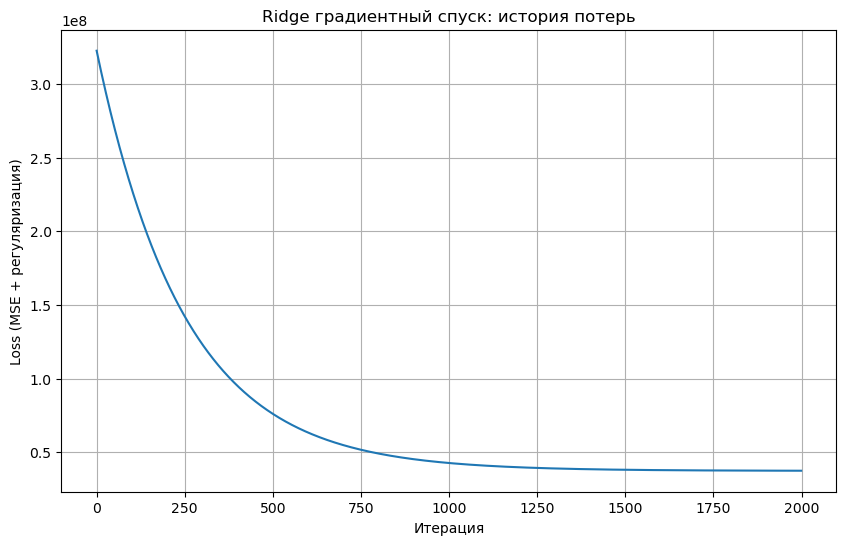

In [8]:
# 3. ДОБАВЛЕНИЕ РЕГУЛЯРИЗАЦИИ
print("\n=== 3. РЕГУЛЯРИЗАЦИЯ ===")

# 3.1 Аналитическое решение с Ridge регуляризацией
def ridge_analytical_solution(X, y, alpha=1.0):
    """Ridge регрессия - аналитическое решение"""
    n_features = X.shape[1]
    return np.linalg.inv(X.T @ X + alpha * np.eye(n_features)) @ X.T @ y

# Подбор оптимального alpha
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
best_alpha = None
best_mse = float('inf')

print("Подбор оптимального alpha для Ridge регрессии:")
for alpha in alphas:
    weights_ridge = ridge_analytical_solution(X_train, y_train, alpha)
    y_pred_ridge = predict(X_test, weights_ridge)
    mse_ridge = mse(y_test, y_pred_ridge)
    
    print(f"Alpha: {alpha}, MSE: {mse_ridge:.2f}")
    
    if mse_ridge < best_mse:
        best_mse = mse_ridge
        best_alpha = alpha

weights_ridge_analytical = ridge_analytical_solution(X_train, y_train, best_alpha)
print(f"\nЛучший alpha: {best_alpha}")
print("Веса (Ridge аналитическое):")
print(f"Intercept: {weights_ridge_analytical[0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature}: {weights_ridge_analytical[i+1]:.2f}")

# 3.2 Градиентный спуск с регуляризацией
class RidgeGradientDescent:
    def __init__(self, learning_rate=0.01, max_iter=1000, tolerance=1e-6, alpha=1.0):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.alpha = alpha
        self.weights = None
        self.loss_history = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        for i in range(self.max_iter):
            # Предсказания
            y_pred = X @ self.weights
            
            # Вычисление градиента с регуляризацией
            gradient = (2/n_samples) * X.T @ (y_pred - y) + 2 * self.alpha * self.weights
            gradient[0] -= 2 * self.alpha * self.weights[0]  # Не регуляризуем intercept
            
            # Обновление весов
            new_weights = self.weights - self.learning_rate * gradient
            
            # Проверка сходимости
            if np.linalg.norm(new_weights - self.weights) < self.tolerance:
                print(f"Сходимость достигнута на итерации {i}")
                break
                
            self.weights = new_weights
            
            # Сохранение истории потерь
            loss = mse(y, y_pred) + self.alpha * np.sum(self.weights[1:]**2)
            self.loss_history.append(loss)
            
            if i % 100 == 0:
                print(f"Итерация {i}, Loss: {loss:.2f}")
    
    def predict(self, X):
        return X @ self.weights

# Обучаем Ridge регрессию градиентным спуском
print("\nОбучение Ridge регрессии градиентным спуском...")
ridge_gd = RidgeGradientDescent(learning_rate=0.001, max_iter=2000, alpha=best_alpha)
ridge_gd.fit(X_train_scaled, y_train)

print("\nВеса (Ridge градиентный спуск):")
print(f"Intercept: {ridge_gd.weights[0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature}: {ridge_gd.weights[i+1]:.2f}")

# Визуализация процесса обучения
plt.figure(figsize=(10, 6))
plt.plot(ridge_gd.loss_history)
plt.title('Ridge градиентный спуск: история потерь')
plt.xlabel('Итерация')
plt.ylabel('Loss (MSE + регуляризация)')
plt.grid(True)
plt.show()


=== 4. ОЦЕНКА ОБОБЩАЮЩЕЙ СПОСОБНОСТИ ===

СРАВНЕНИЕ МОДЕЛЕЙ (MSE на тестовых данных):
Линейная регрессия (аналитическая): 33635210.43
Ridge регрессия (аналитическая): 33635233.87
Линейная регрессия (градиентный спуск): 33792949.58
Ridge регрессия (градиентный спуск): 33803344.91
Константная модель (среднее): 155391443.68


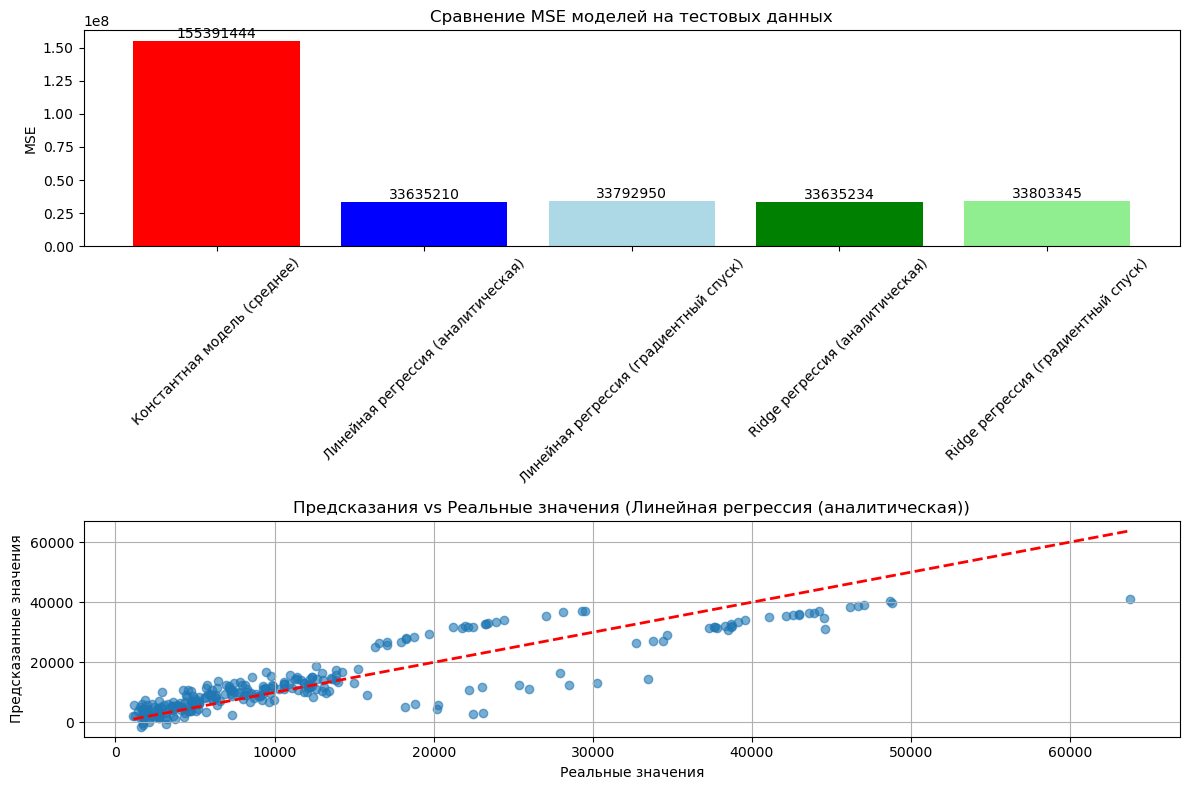


Лучшая модель: Линейная регрессия (аналитическая) с MSE = 33635210.43

=== АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ===
Важность признаков (по абсолютным весам Ridge регрессии):
          Feature        Weight
5  smoker_encoded  23647.665969
0       Intercept -11946.198943
3        children    425.084734
2             bmi    335.772827
6  region_encoded   -271.290144
1             age    257.054295
4     sex_encoded    -18.804350


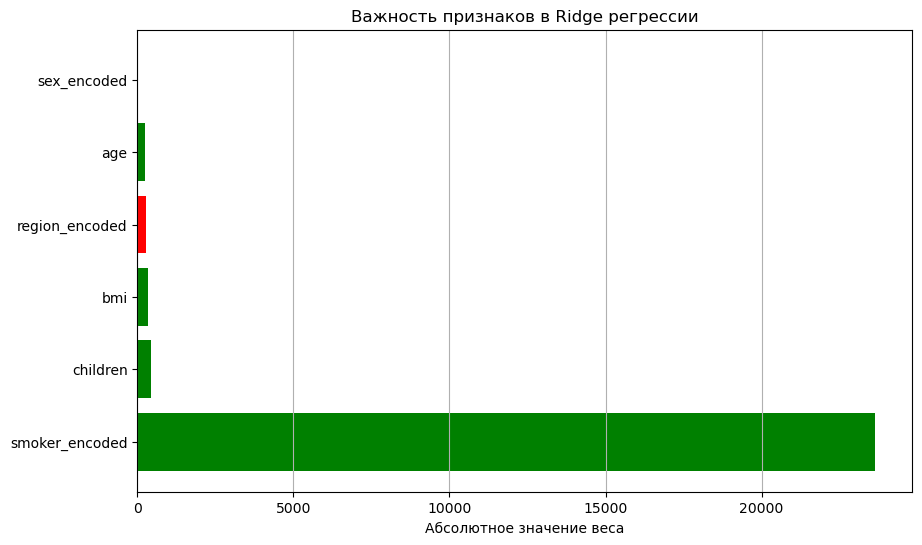

In [26]:
# 4. ОЦЕНКА ОБОБЩАЮЩЕЙ СПОСОБНОСТИ
print("\n=== 4. ОЦЕНКА ОБОБЩАЮЩЕЙ СПОСОБНОСТИ ===")

# Константная модель (прогноз средним значением)
constant_pred = np.full_like(y_test, np.mean(y_train))
mse_constant = mse(y_test, constant_pred)

# Линейная регрессия (аналитическая)
y_pred_analytical = predict(X_test, weights_analytical)
mse_analytical = mse(y_test, y_pred_analytical)

# Линейная регрессия (градиентный спуск)
y_pred_gd = gd.predict(X_test_scaled)
mse_gd = mse(y_test, y_pred_gd)

# Ridge регрессия (аналитическая)
y_pred_ridge_analytical = predict(X_test, weights_ridge_analytical)
mse_ridge_analytical = mse(y_test, y_pred_ridge_analytical)

# Ridge регрессия (градиентный спуск)
y_pred_ridge_gd = ridge_gd.predict(X_test_scaled)
mse_ridge_gd = mse(y_test, y_pred_ridge_gd)

# Сравнение моделей
results = {
    'Константная модель (среднее)': mse_constant,
    'Линейная регрессия (аналитическая)': mse_analytical,
    'Линейная регрессия (градиентный спуск)': mse_gd,
    'Ridge регрессия (аналитическая)': mse_ridge_analytical,
    'Ridge регрессия (градиентный спуск)': mse_ridge_gd
}

print("\nСРАВНЕНИЕ МОДЕЛЕЙ (MSE на тестовых данных):")
for model, error in sorted(results.items(), key=lambda x: x[1]):
    print(f"{model}: {error:.2f}")

# Визуализация сравнения
plt.figure(figsize=(12, 8))
models = list(results.keys())
errors = list(results.values())

plt.subplot(2, 1, 1)
bars = plt.bar(models, errors, color=['red', 'blue', 'lightblue', 'green', 'lightgreen'])
plt.title('Сравнение MSE моделей на тестовых данных')
plt.ylabel('MSE')
plt.xticks(rotation=45)
for bar, error in zip(bars, errors):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{error:.0f}', ha='center', va='bottom')

# Визуализация предсказаний vs реальные значения для лучшей модели
best_model_name = min(results, key=results.get)
if best_model_name == 'Константная модель (среднее)':
    best_pred = constant_pred
elif best_model_name == 'Линейная регрессия (аналитическая)':
    best_pred = y_pred_analytical
elif best_model_name == 'Линейная регрессия (градиентный спуск)':
    best_pred = y_pred_gd
elif best_model_name == 'Ridge регрессия (аналитическая)':
    best_pred = y_pred_ridge_analytical
else:
    best_pred = y_pred_ridge_gd

plt.subplot(2, 1, 2)
plt.scatter(y_test, best_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Предсказания vs Реальные значения ({best_model_name})')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nЛучшая модель: {best_model_name} с MSE = {results[best_model_name]:.2f}")

# Дополнительный анализ: важность признаков
print("\n=== АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ===")

# Используем веса из Ridge регрессии (более устойчивые)
feature_importance = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Weight': weights_ridge_analytical,
    'Absolute_Weight': np.abs(weights_ridge_analytical)
})

feature_importance = feature_importance.sort_values('Absolute_Weight', ascending=False)
print("Важность признаков (по абсолютным весам Ridge регрессии):")
print(feature_importance[['Feature', 'Weight']])

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
features_sorted = feature_importance['Feature'][0:]  # исключаем intercept
weights_sorted = feature_importance['Weight'][0:]
del features_sorted[0]
del weights_sorted[0]

colors = ['green' if w > 0 else 'red' for w in weights_sorted]
plt.barh(features_sorted, np.abs(weights_sorted), color=colors)
plt.xlabel('Абсолютное значение веса')
plt.title('Важность признаков в Ridge регрессии')
plt.grid(True, axis='x')
plt.show()